# 카테고리 분포 (Categorical Distribution)

- 베르누이 분포의 확장판 (벡터형 분포)
- 1~K개의 정수 값 중 하나가 나오는 확률변수의 분포
- 예) 주사위 K=6 확률변수 {1, 2, 3, 4, 5, 6}

(표현) One-Hot Encoding 

\begin{eqnarray}
x = 1  \;\; & \rightarrow & \;\; x = (1, 0, 0, 0, 0, 0) \\
x = 2  \;\; & \rightarrow & \;\; x = (0, 1, 0, 0, 0, 0) \\
x = 3  \;\; & \rightarrow & \;\; x = (0, 0, 1, 0, 0, 0) \\
x = 4  \;\; & \rightarrow & \;\; x = (0, 0, 0, 1, 0, 0) \\
x = 5  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 1, 0) \\
x = 6  \;\; & \rightarrow & \;\; x = (0, 0, 0, 0, 0, 1) \\
\end{eqnarray}

$$ 곧, x = (x_1, x_2, x_3, x_4, x_5, x_6) $$

(조건)
- 0, 1만 가능하고 $x_i = \begin{cases} 0 \\ 1 \end{cases} \;\longrightarrow $ 
- 여러 개의$x_i$ 즉 K 중 하나만 1 $\sum_{k=1}^K x_k = 1$


(모수의 제한조건)  
$x_k$값은 베르누이 확률 분포로 볼 수 있으므로, 모수 $\theta_k$를 가진다
$$ \theta = ( \theta_1, \cdots , \theta_K )\; ,\;\;\;  (0 \leq \theta_i \leq 1,\;\; \sum_{k=1}^K \theta_k = 1) $$

## 카테고리 분포의 표기
- $\text{Cat}(x_1, x_2, \dots, x_K;\theta_1, \dots, \theta_K)$

혹은

- 출력 벡터 $x=(x_1, x_2, \dots, x_K)^T$, 모수 벡터 $\theta=(\theta_1, \dots, \theta_K)^T$를 활용,

$$\rightarrow \text{Cat}(x;\theta) $$


(함수의 표기)
$$ 
\text{Cat}(x;\theta) = 
\begin{cases}
\theta_1 & \text{if } x = (1, 0, 0, \cdots, 0) \\
\theta_2 & \text{if } x = (0, 1, 0, \cdots, 0) \\
\theta_3 & \text{if } x = (0, 0, 1, \cdots, 0) \\
\vdots & \vdots \\
\theta_K & \text{if } x = (0, 0, 0, \cdots, 1) \\
\end{cases}
$$

$$ \text{Cat}(x;\theta) = \theta_1^{x_1} \theta_2^{x_2}  \cdots \theta_K^{x_K}  =  \prod_{k=1}^K \theta_k^{x_k} $$

# 카테고리 분포의 모멘트

#### 기대값

$$\text{E}[x_k] = \theta_k$$

#### 분산

$$\text{Var}[x_k] = \theta_k(1-\theta_k)$$

## 카테고리 분포 만들기

In [11]:
np.random.seed(0)
theta = np.array([1/6]*6) # 1/6확률이 6개인 벡터 생성
X = np.random.multinomial(1, theta, size=20) # 합이 1로 이루어진 벡터를 20개 생성

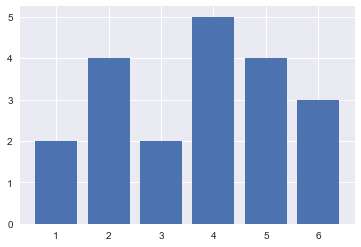

In [12]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show() # 빈도 도출

In [13]:
# 이론과 시뮬레이션 비교
# theta와 각 숫자가 고르게 평균인 시뮬레이션
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df.head()

,value,type,ratio
0,0,simulation,0.100000
1,0,theoretic,0.166667
2,1,simulation,0.200000
3,1,theoretic,0.166667
4,2,simulation,0.100000


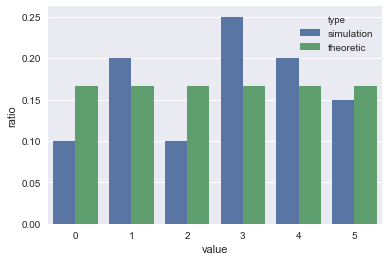

In [14]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

$\theta$를 다른 값으로 지정한다면

In [15]:
np.random.seed(0)
theta = np.array([0, 0, 0.1, 0.2, 0.3, 0.4]) # 사용자 지정
X = np.random.multinomial(1, theta, size=20)
X

array([[0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0]])

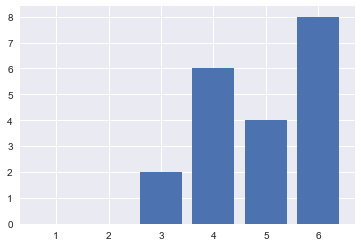

In [16]:
plt.bar(np.arange(1, 7), X.sum(axis=0), align="center")
plt.show()

In [18]:
df = pd.DataFrame({"theoretic": theta, "simulation": X.mean(axis=0)}).stack()
df = df.reset_index()
df.columns = ["value", "type", "ratio"]
df

,value,type,ratio
0,0,simulation,0.0
1,0,theoretic,0.0
2,1,simulation,0.0
3,1,theoretic,0.0
4,2,simulation,0.1
5,2,theoretic,0.1
6,3,simulation,0.3
7,3,theoretic,0.2
8,4,simulation,0.2
9,4,theoretic,0.3


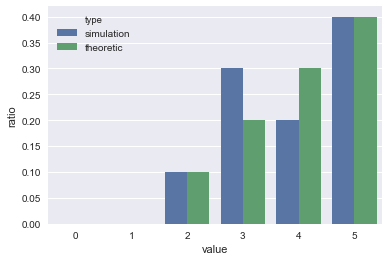

In [19]:
sns.barplot(x="value", y="ratio", hue="type", data=df)
plt.show()

베르누이의 시뮬레이션 -> 이항 분포  

카테고리 분포의 시뮬레이션 -> 다항 분포
